# <center> `Hotel booking demand` </center>

We will use the Hotel Booking Demand dataset from the Kaggle.
This dataset contain information of hotel booking, We will perform exploratory data analysis to get insight from the data.  

You can download it from here:
https://www.kaggle.com/jessemostipak/hotel-booking-demand

### We will try to answer the following Questions
1. How Many Booking Were Cancelled?
2. What is the booking ratio between Resort Hotel and City Hotel?
3. What is the percentage of booking for each year?
4. Which is the most busy month for hotel?
5. From which country most guest come?
6. How Long People Stay in the hotel?
7. Which was the most booked accommodation type (Single, Couple, Family)?


### After that we will make predictive model to predict whether the booking will be cancelled or not

**We will:**
- Perform the Feature Engineering to make new featuers
- Perform the Data Selection to select only relevant features
- Tranform the Data (Categorial to Numerical)
- Split the data (Train Test Split)
- Model the data (Fit the Data)
- And finally Evaluate our model

Let's Start
<hr>

## Packages Import

In [15]:
#!pip install pycountry

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc
import matplotlib.ticker as mtick

pd.options.display.max_columns = None

In [16]:
## Importing Data
data = pd.read_csv('hotel_bookings.csv')

In [17]:
## Show the first 5 rows of Data
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


<hr>

## Data Pre-Processing

First copy the dataset, so our original dataset remains unchanged

In [18]:
## Copy the dataset
df = data.copy()

### `1. Dealing with Missing Values`

In [19]:
## Find the missing value, show the total null values for each column and sort it in descending order
df.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

We have 4 features with missing values.

In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.

In [20]:
## If no id of agent or company is null, just replace it with 0
df[['agent','company']] = df[['agent','company']].fillna(0.0)

Children column contains the count of children, so we will replace all the missing values with the rounded mean value.

And our country column contains country codes representing different countries. It is a categorical feature so I will also replace it with the mode value. The mode value is the value that appears more than any other value. So, in this case, I am replacing it with the country that appears the most often.

In [21]:
## For the missing values in the country column, replace it with mode (value that appears most often)
df['country'].fillna(data.country.mode().to_string(), inplace=True)


## for missing children value, replace it with rounded mean value
df['children'].fillna(round(data.children.mean()), inplace=True)

There are many rows that have zero guests including adults, children and babies. These type of rows does not make

We have 180 such rows. we will just remove these rows.

In [22]:
df[(df.adults+df.babies+df.children)==0].shape

(180, 32)

In [23]:
## Drop Rows where there is no adult, baby and child
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

### `2. Converting Datatype`

Check the datatype for each column:

In [24]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

We can see different data types for different columns.

There are some columns like children, company, and agent, that are float type but their values are only in integers.

So we will convert them to the integer type.

In [25]:
## convert datatype of these columns from float to integer
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

<hr>

## Exploratory Data Analysis

Now let’s do the fun part, extract the information from our data and try to answer our questions.

### 1. How Many Booking Were Cancelled?

Let’s write the function to get the percentage of different values.

In [28]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

This function takes a series or data frame column and returns the two arrays

x is our unique values
y is the percentage value of each unique value

Now let’s use this function on our is_canceled feature and see the result

In [30]:
x,y = get_count(df['is_canceled'])

x,y

(array([0, 1]), array([62.92341247, 37.07658753]))

    is_canceled have two unique values: 1 if booking got canceled, else 0.

Now let’s plot this result. I will write another function to plot the diagram. The good thing about writing function is that we can reuse the code again and again.

In [31]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

This function takes two arrays, x, and y and displays the required diagram. The default plot type is a bar plot, but it can also plot the line plot. Optional arguments can be given to display title and labels.

Now let’s call the function

### Let's try to answer our questions

### `1. How Many Booking Were Cancelled`

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


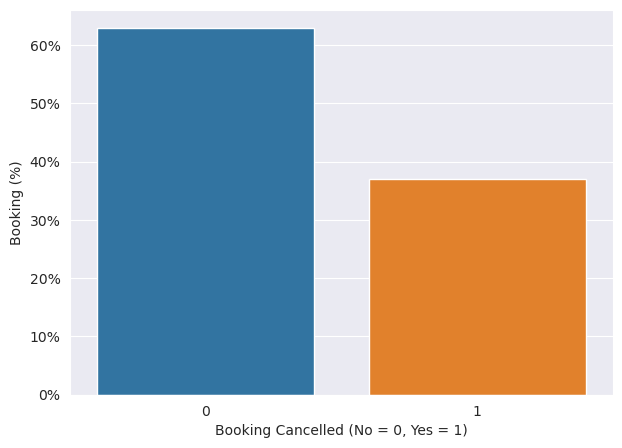

In [32]:
x,y = get_count(df['is_canceled'])
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

Bookings got canceled 37% of the time. While booking guest did checkd-in (did not cancel the booking ) almost 63% of the time.

#### `For further analysis, Select only those booking which did not get cancelled.`

In [34]:
df_not_canceled = df[df['is_canceled'] == 0]

### `2. What is the booking ratio between Resort Hotel and City Hotel?`

Let’s answer another question, how many bookings were made for each type of hotel.

We can now reuse the functions that we created earlier. All we have to do is to pass the dataframe column to get_count() function and pass its result (x and y array) to plot function.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


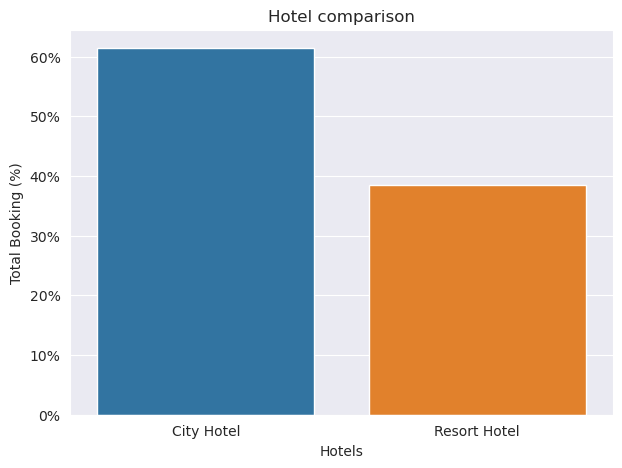

In [35]:
x,y = get_count(df_not_canceled['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

More than 60% of the population booked the City hotel

### `3. What is the percentage of booking for each year?`

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


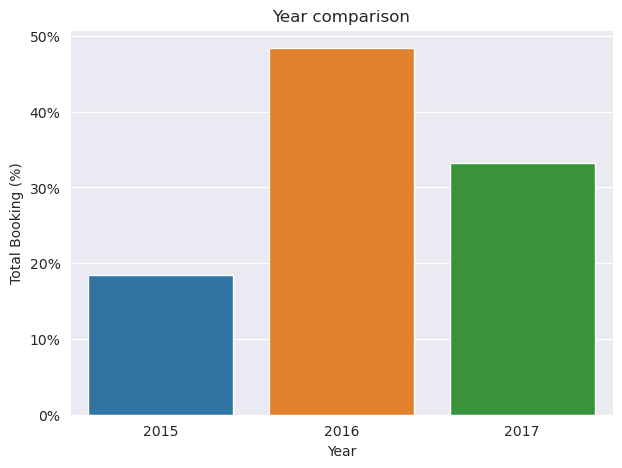

In [36]:
x,y = get_count(df_not_canceled['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

    More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% the next year.

Let’s separate it by the hotel and then plot the diagram. We will change our code to display the countplot.

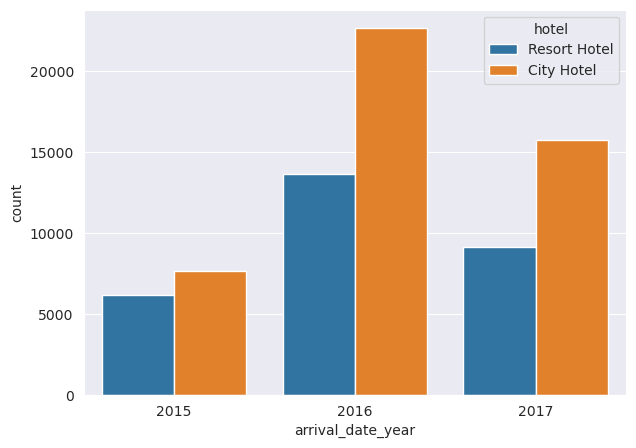

In [38]:
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled);

Year-wise and Hotel-wise (side-by-side) comparison

### `4. Which is the most busy month for hotel?`

To answer this question, we will select the arrival_date_month feature and get its value count. Now the resulting data will not be sorted according to month order so we have to sort it. We will make the new list with the names of months in order to sort our data according to this list.

We will display the Lineplot to display the trend.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


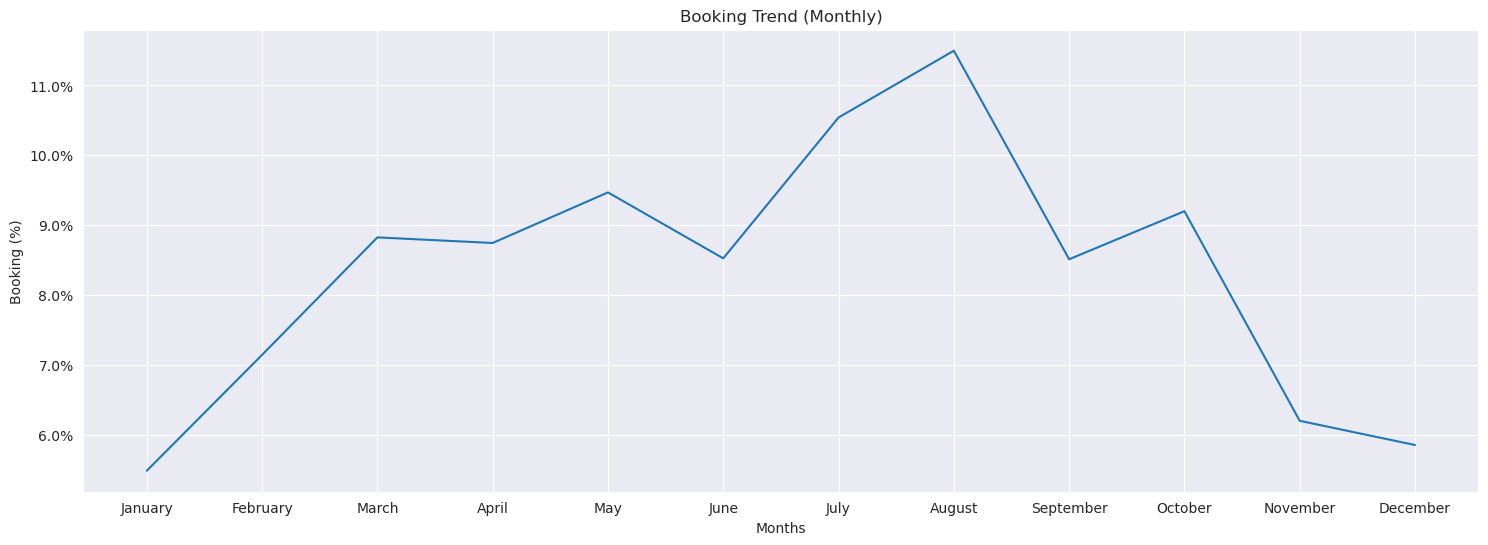

In [39]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100


#sns.lineplot(x, y.values)
plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))

    As we can see most bookings were made from July to August. And the least bookings were made at the start and end of the year.

Let’s separate the data for each hotel type and then see the trend.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


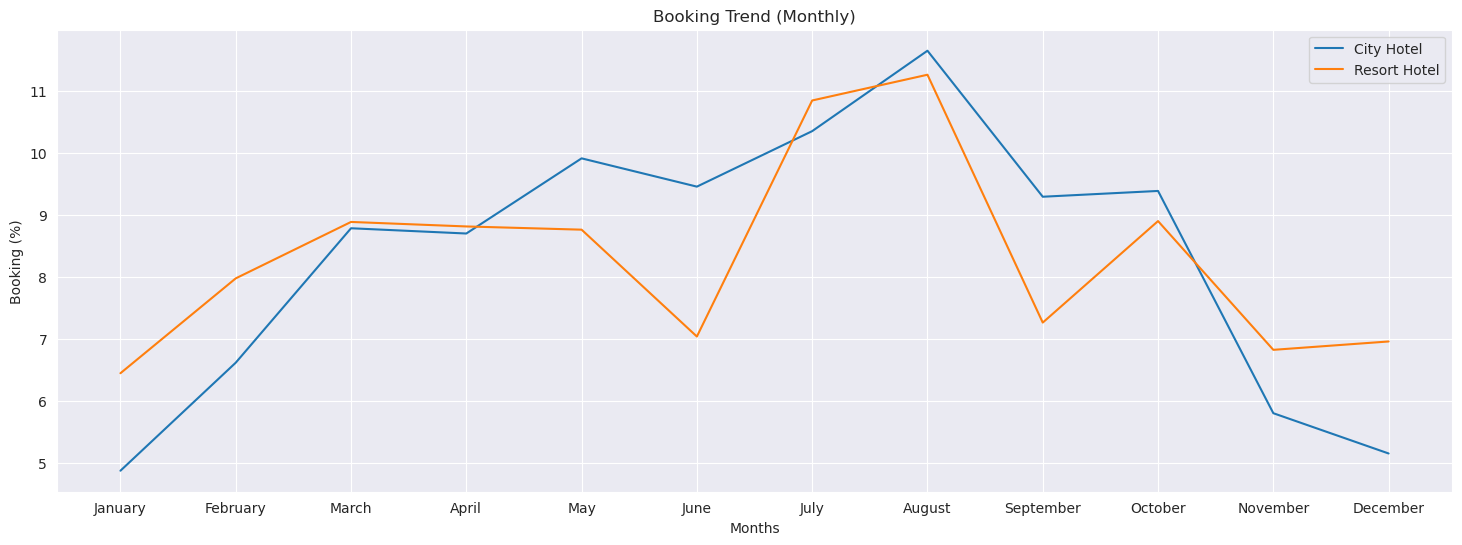

In [40]:
## Order of months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


## Select only City Hotel
sorted_months = df_not_canceled.loc[df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100



## Select only Resort Hotel
sorted_months = df_not_canceled.loc[df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100






## Draw the line plot

fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')


sns.lineplot(x1, y1.values, label='City Hotel')
sns.lineplot(x1, y2.values, label='Resort Hotel')

plt.show()

Line plot to show the monthly hotel booking trend (separate line for each hotel type)

    We can see the trend is kind of similar with a small difference. Resort has more bookings at the start and end of the year, and lower booking in June and September.

### `5. From which country most guest come? `

To see the country wise comparison plot the country column. In the country column, we have codes for each country like PRT for Portugal.

    To get the country names we will use pycountry. pycountry is a very useful python package.
    GitHub | PyPi

We will use this package to get country names from country codes

`**pycountry** is very useful python package.`  
`We will use this package to get country names from country codes`

- `https://github.com/flyingcircusio/pycountry`
- `https://pypi.org/project/pycountry/`

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


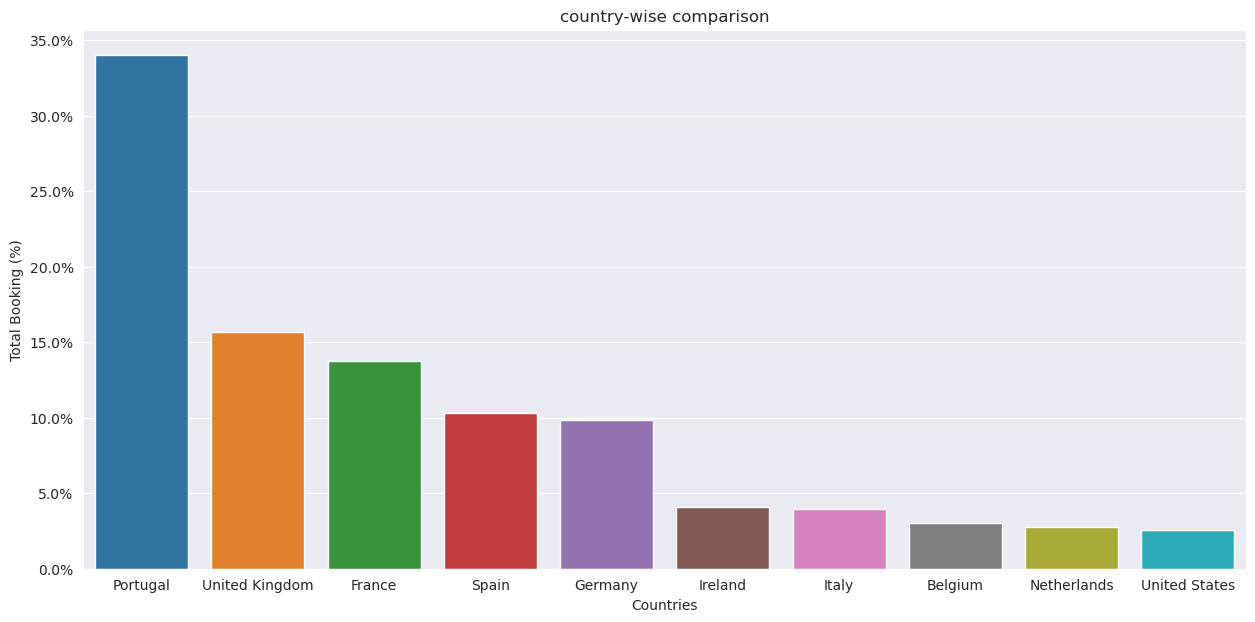

In [41]:
import pycountry as pc

x,y = get_count(df_not_canceled['country'], limit=10)

## For each country code select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

plot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='country-wise comparison', figsize=(15,7))

Portugal, UK and France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.

### `6. How Long People Stay in the hotel?`

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


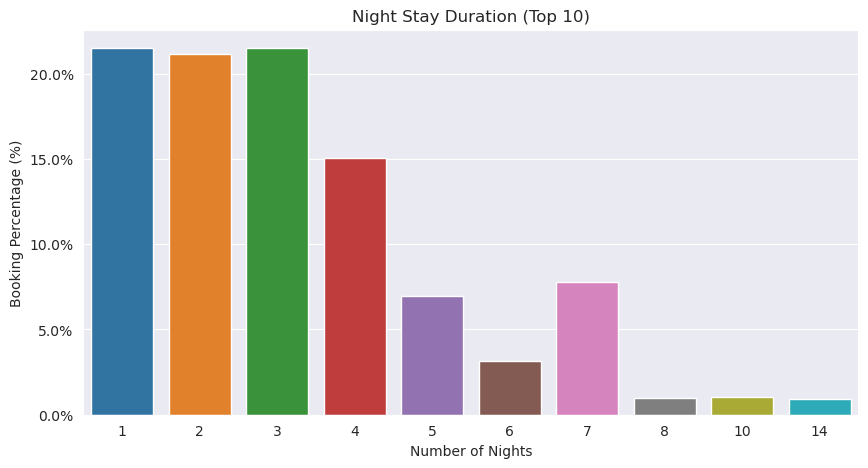

In [42]:
total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))

Most people stay for one, two, or three. More than 60% of guests come under these three options.

Let’s see the stay duration trend for each hotel type.

/tmp/ipykernel_21915/2010700537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']


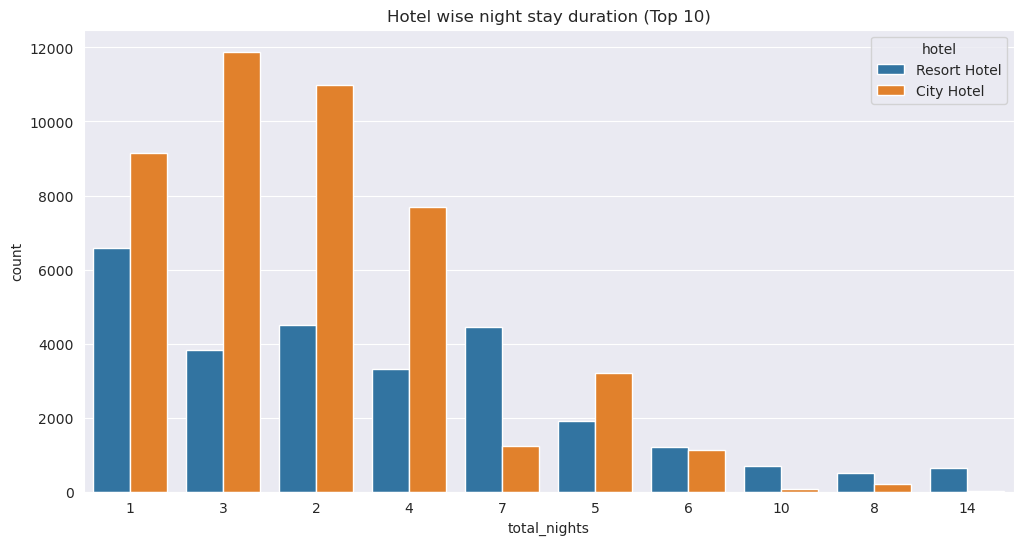

In [43]:
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

For Resort hotel, the most popular stay duration is three, two, one, and four days respectively.
For City hotel, most popular stay duration is one, two, seven(week), and three respectively

### `7.Which was the most booked accommodation type (Single, Couple, Family)?`

We will divide people staying in the hotel into 3 categories.

Single: 1 Adult only

Couple: 2 Adults we can’t say for sure that these two people are an actual couple or not, data does not tell us anything about this, but we will assume they are couple :P

Family or Friends: More than 2 people including adults, children, and babies. (or alternatively, we can call it a group)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


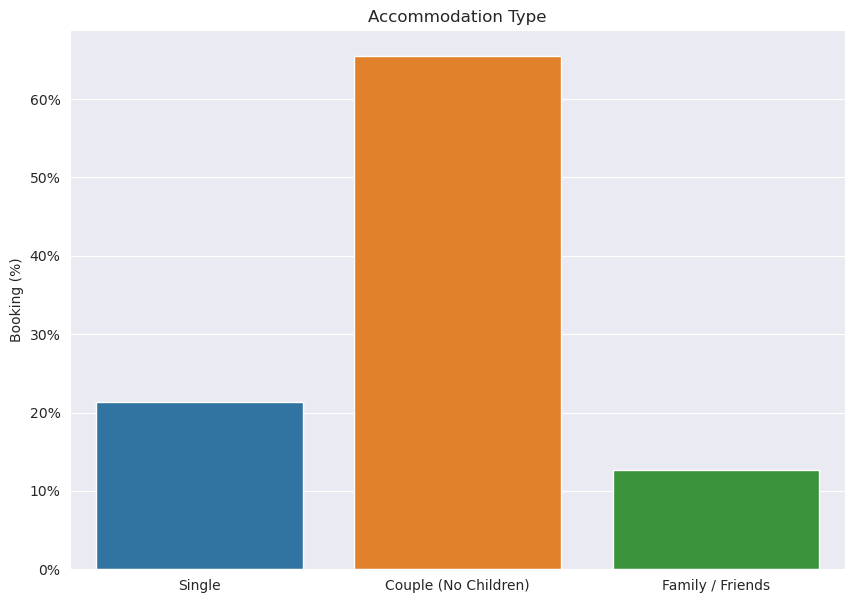

In [44]:
## Select single, couple, multiple adults and family
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
#n_adults = df_not_canceled[(df_not_canceled.adults>2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]


## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))

Couple (or 2 adults) is the most popular accommodation type. So hotels can make plans accordingly

<hr>

## Feature Selection and Feature Engineering

Before we start making a predictive model. let’s do the Feature selection and feature engineering. We will create more relevant features and remove irrelevant or less important features.

First, make a copy of dataframe.

In [45]:
## Copy the dataframe
df_subset = df.copy()

Feature engineering is a very important part and a very difficult one. Take some time and try to think about what type of new features we can create from our existing features?

Now let’s create some new features.

    - We have two features in our dataset reserved_room_type and another is assigned_room_type. We will make the new feature let’s call it Room which will contain 1 if the guest was assigned the same room that was reserved else 0. Guest can cancel the booking if he did not get the same room. clever right?

    - Another feature will be net_cancelled. It will contain 1 If the current customer has canceled more bookings in the past than the number of bookings he did not cancel, else 0.

In [47]:
## Make the new column which contain 1 if guest received the same room which was reserved otherwise 0
df_subset['Room'] = 0
df_subset.loc[ df_subset['reserved_room_type'] == df_subset['assigned_room_type'] , 'Room'] = 1


## Make the new column which contain 1 if the guest has cancelled more booking in the past
## than the number of booking he did not cancel, otherwise 0

df_subset['net_cancelled'] = 0
df_subset.loc[ df_subset['previous_cancellations'] > df_subset['previous_bookings_not_canceled'] , 'net_cancelled'] = 1

In [48]:
## Remove the less important features
df_subset = df_subset.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date','previous_cancellations','previous_bookings_not_canceled'],axis=1)

Let’s also remove the reservation_status. Even though it is a very important feature, but it already has information about canceled booking. Further, It can only have information after the booking was canceled or the guest checked in. So it will not be useful to use this feature in our predictive model. Because for the future prediction we won’t have information about the reservation status.

In [50]:
## Remove reservation_status column
## because it tells us if booking was cancelled 
df_subset = df_subset.drop(['reservation_status'], axis=1)

KeyError: "['reservation_status'] not found in axis"

### Let’s plot the heatmap and see the correlation

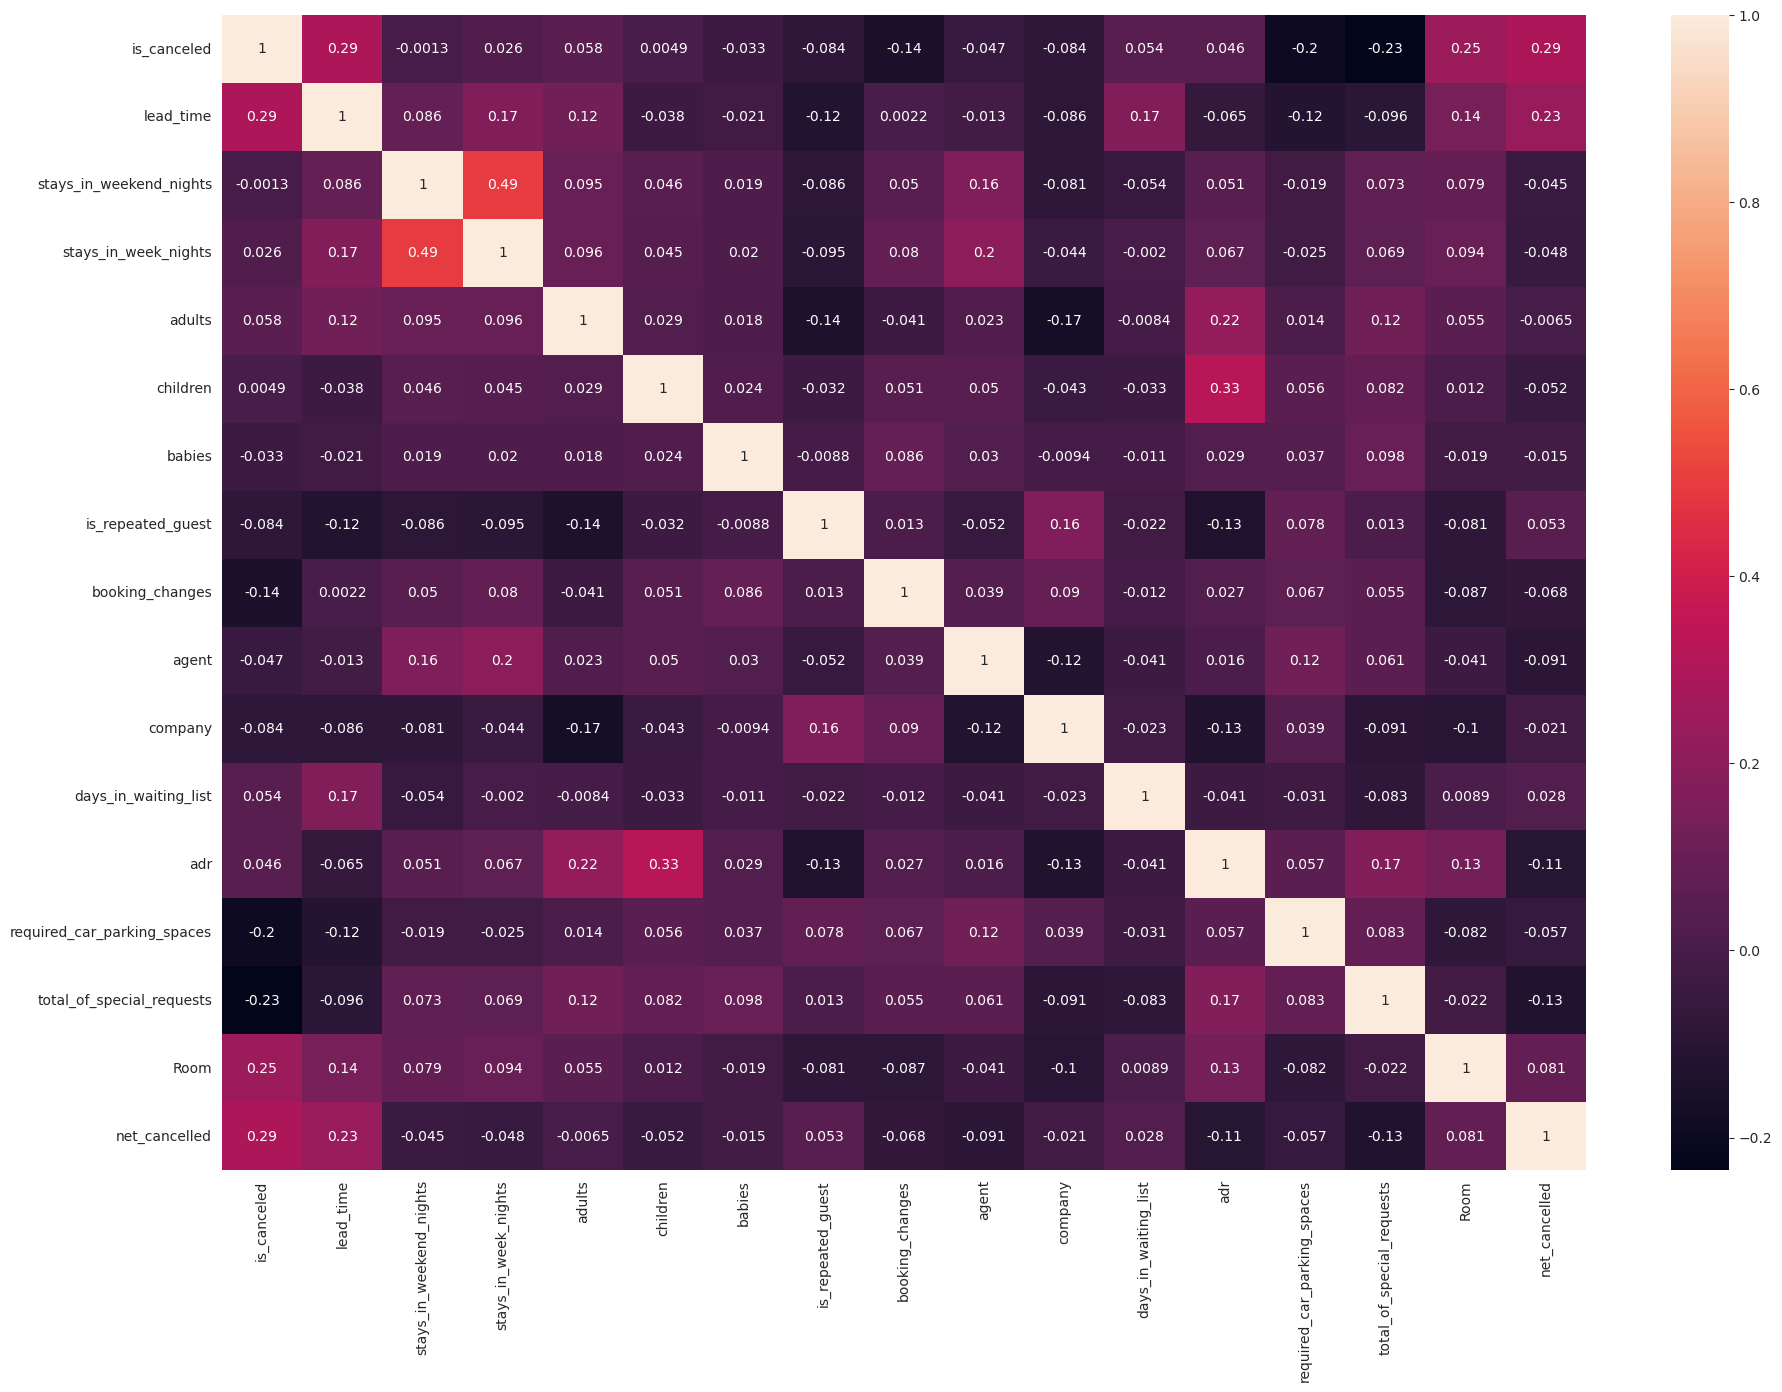

In [49]:
## Plot the heatmap to see correlation with columns
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(), annot=True, ax=ax);

Correlation Matrix

We can see our new features, Room and net_cancelled have a higher correlation with is_cancelled than most of the other columns.

<hr>

## Modeling

### 1. `Converting Categorical variables to Numerical`

Let’s convert categorical values into numerical form.

We will use LabelEncoder from Sklearn to encode in an ordinal fashion.

In [56]:
def transform(dataframe):
    
    
    ## Import LabelEncoder from sklearn
    from sklearn.preprocessing import LabelEncoder
    
    le = LabelEncoder()
    
    
    ## Select all categorcial features
    categorical_features = list(dataframe.columns[dataframe.dtypes == object])
    
    
    ## Apply Label Encoding on all categorical features
    return dataframe[categorical_features].apply(lambda x: le.fit_transform(x))

df = transform(df)

### `2.Train Test Split`

Now let’s split the dataset into train and test. The default size of the split ratio is 3:1

In [57]:
def data_split(df, label):
    
    from sklearn.model_selection import train_test_split

    X = df.drop(label, axis=1)
    Y = df[label]

    x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0)
    
    return x_train, x_test, y_train, y_test



x_train, x_test, y_train, y_test = data_split(df_subset, 'is_canceled')

### `Machine Learning Model (Decision Tree)`

We will use the decision as our predicting model. Let’s fit the data.

In [58]:
def train(x_train, y_train):
    from sklearn.tree import DecisionTreeClassifier

    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(x_train,y_train)
    
    return clf


clf = train(x_train, y_train)

ValueError: could not convert string to float: 'Resort Hotel'

### `4.Evaluatation of the Model`

Let’s now evaluate our model. We will print the training and testing accuracy

In [54]:
def Score(clf,x_train,y_train,x_test,y_test):
    train_score = clf.score(x_train,y_train)
    test_score = clf.score(x_test,y_test)

    print("========================================")
    print(f'Training Accuracy of our model is: {train_score}')
    print(f'Test Accuracy of our model is: {test_score}')
    print("========================================")
    
    
Score(clf,x_train,y_train,x_train,y_train)

NameError: name 'clf' is not defined

    Aha! Almost perfect accuracy.

Let’s pick any random sample and try to make the prediction and compare it with the actual values

In [55]:
## Getting Prediciton of 10th record of x_train
prediction = clf.predict(x_train.iloc[10].values.reshape(1,-1))

## Actual Value of 10th record of x_train from y_train
actual_value = y_train.iloc[10]

print(f'Predicted Value \t: {prediction[0]}')
print(f'Actual Value\t\t: {actual_value}')

NameError: name 'clf' is not defined

Our model correctly predicted that the guest will not cancel the booking.

---------------

Conclusion:

We used the dataset that contains data about hotel bookings

We cleaned and preprocessed the data and then we performed the exploratory data analysis to extract information from the data to answer the following questions.

    How Many Booking Were Cancelled?
    What is the booking ratio between Resort Hotel and City Hotel?
    What is the percentage of booking for each year?
    Which is the busiest month for hotels?
    From which country most guests come?
    How Long People Stay in the hotel?
    Which was the most booked accommodation type (Single, Couple, Family)?

We learned that

    Almost 35% of bookings were canceled.
    More than 60% of the population booked the City hotel.
    More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% next year.
    Most bookings were made from July to August. And the least bookings were made at the start and end of the year.
    Portugal, the UK, and France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.
    Most people stay for one, two, or three.
    -> For Resort hotel, the most popular stay duration is three, two, one, and four days respectively.
    -> For City hotel, most popular stay duration is one, two, seven(week), and three respectively
    Couple (or 2 adults) is the most popular accommodation type. So hotels can make arrangement plans accordingly

We then performed feature selection and feature engineering, and then made the predictive model using the Decision Tree to predict whether our customer/guest will cancel the booking or not. And we achieved 99% accuracy.